# Conteo coincidencias

Busaremos simular el proceso de conteo de coincidencias con dos APD (detectores) testigo y señal, y ls coincidencias de fotones par correlacionados que llegan a estos

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
N = 100000      # Número de fotones en un segundo
NQ = 10000      # Número de pares de fotones
NN = 100000     # Número de particiones en un segundo
nexp = 30       # Número de Experimentos

# Inicializar arrays
st = np.zeros(NN)
si = np.zeros(NN)
sit = np.zeros(NN)
g2 = np.zeros(nexp)

# Probabilidades
ff = float(N) / float(NN)      # Probabilidad de tener un fotón individual
ffQ = float(NQ) / float(NN)    # Probabilidad de tener un par

g2p = 0.0
promedio_coincidencias = 0.0

for j in range(nexp):
    # Series aleatorias transmitida
    st = np.random.rand(NN) <= ff

    # Serie aleatoria testigo, que también funciona como señal
    si = np.random.rand(NN) <= ffQ
    unosi = np.sum(si)

    # Sumamos las series testigo y transmitida
    dh = np.random.rand(NN)
    sit = si * (dh >= 0.5)

    # Actualizar st con sit
    st += sit
    unost = np.sum(st != 0)

    # Número de coincidencias dobles entre si y st
    nc = np.sum(si * st != 0)

    # Cálculo de g2
    g2[j] = (float(nc) / (unost * unosi)) * float(NN)

    # Acumulación de promedios de g2 y de coincidencias
    g2p += g2[j] / float(nexp)
    promedio_coincidencias += nc / float(nexp)

    # Muestra del número de coincidencias y resultados de g2 para cada experimento
    print(f'Experimento {j+1}: Coincidencias = {nc}, g2 = {g2[j]}')

# Cálculo de la desviación estándar para g2
v2 = np.sum((g2p - g2) ** 2) / float(nexp) ** 2
sigma2 = np.sqrt(v2)

print(f'\nPromedio de coincidencias: {promedio_coincidencias}')
print(f'Promedios: g2 = {g2p}, sigma2 = {sigma2}')

Experimento 1: Coincidencias = 9851, g2 = 1.0
Experimento 2: Coincidencias = 9833, g2 = 1.0
Experimento 3: Coincidencias = 10080, g2 = 1.0
Experimento 4: Coincidencias = 9986, g2 = 1.0
Experimento 5: Coincidencias = 9910, g2 = 1.0
Experimento 6: Coincidencias = 9916, g2 = 1.0
Experimento 7: Coincidencias = 10115, g2 = 1.0
Experimento 8: Coincidencias = 10134, g2 = 1.0
Experimento 9: Coincidencias = 10117, g2 = 1.0
Experimento 10: Coincidencias = 10110, g2 = 1.0
Experimento 11: Coincidencias = 10090, g2 = 1.0
Experimento 12: Coincidencias = 9979, g2 = 1.0
Experimento 13: Coincidencias = 10148, g2 = 1.0
Experimento 14: Coincidencias = 9933, g2 = 1.0
Experimento 15: Coincidencias = 9988, g2 = 1.0
Experimento 16: Coincidencias = 10034, g2 = 1.0
Experimento 17: Coincidencias = 9849, g2 = 1.0
Experimento 18: Coincidencias = 10112, g2 = 1.0
Experimento 19: Coincidencias = 10068, g2 = 1.0
Experimento 20: Coincidencias = 9990, g2 = 1.0
Experimento 21: Coincidencias = 10103, g2 = 1.0
Experimento

Promedios: 0.0016553341033764398 263.2437385924172
Desviaciones estándar: 1.2650017498491792e-05 1.802673372102434


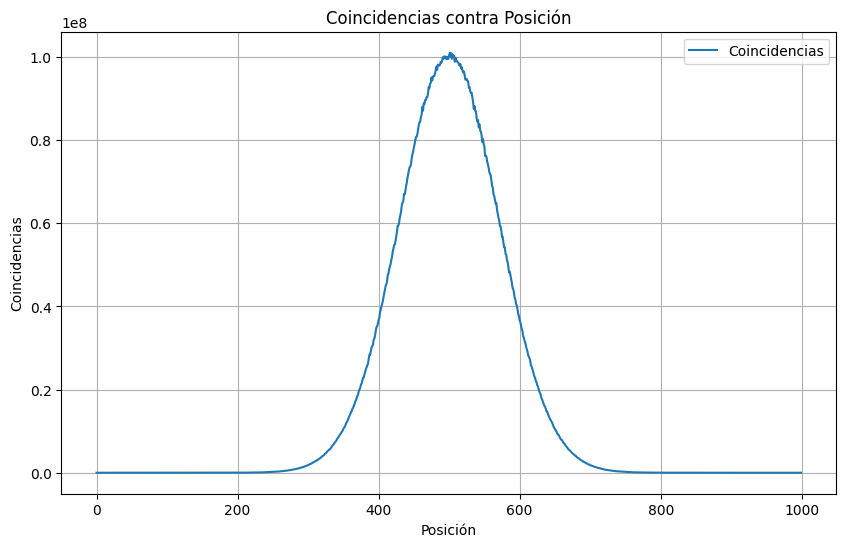

In [5]:
# Parámetros
N = 100000  # Número de fotones en un segundo
NQ = 10000  # Número de pares de fotones
NN = 200000  # Número de particiones en un segundo
nexp = 70  # Número de Experimentos
NPos = 1000  # Número de posiciones en el espacio

# Inicializar arrays para resultados
g2 = np.zeros(nexp)
g3 = np.zeros(nexp)
coincidences_positions = np.zeros(NPos)  # Para guardar las coincidencias en cada posición

# Probabilidades
ff = float(N) / float(NN)  # Probabilidad de tener un fotón individual
ffQ = float(NQ) / float(NN)  # Probabilidad de tener un par

g2p = 0.0
g3p = 0.0

# Distribución espacial (Gaussiana centrada a la mitad del camino)
mu = NPos // 2
sigma = NPos // 10
positions = np.arange(NPos)
prob_distribution = np.exp(-0.5 * ((positions - mu) / sigma) ** 2)
prob_distribution /= prob_distribution.sum()  # Normalizar

for j in range(nexp):
    # Series aleatorias transmitida y reflejada con distribución espacial
    st_positions = np.random.choice(positions, NN, p=prob_distribution)  # Posiciones de fotones transmitidos
    sr_positions = np.random.choice(positions, NN, p=prob_distribution)  # Posiciones de fotones reflejados

    # Serie aleatoria testigo, que también funciona como señal
    si_positions = np.random.choice(positions, NN, p=prob_distribution)  # Posiciones de fotones testigo

    # Contar fotones en cada posición
    st_counts = np.bincount(st_positions, minlength=NPos)
    sr_counts = np.bincount(sr_positions, minlength=NPos)
    si_counts = np.bincount(si_positions, minlength=NPos)

    # Doble rendija: Distribuir los fotones testigo entre transmitida y reflejada
    dh = np.random.rand(NN)
    sit_positions = si_positions[dh >= 0.5]
    sir_positions = si_positions[dh < 0.5]

    # Actualizar st y sr con los fotones testigo
    sit_counts = np.bincount(sit_positions, minlength=NPos)
    sir_counts = np.bincount(sir_positions, minlength=NPos)

    st_counts += sit_counts
    sr_counts += sir_counts

    # Número de coincidencias dobles
    nc = np.sum(st_counts * sr_counts != 0)

    # Coincidencias triples
    nc123 = np.sum(si_counts * st_counts * sr_counts != 0)
    nc13 = np.sum(st_counts * si_counts != 0)
    nc23 = np.sum(sr_counts * si_counts != 0)

    # Asegurar que no haya división por cero
    if nc13 == 0 or nc23 == 0:
        g3[j] = 0
    else:
        g3[j] = (float(nc123) / (float(nc13) * float(nc23))) * np.sum(si_counts)

    # Cálculo de g2
    if np.sum(st_counts) == 0 or np.sum(sr_counts) == 0:
        g2[j] = 0
    else:
        g2[j] = (float(nc) / (np.sum(st_counts) * np.sum(sr_counts))) * float(NN)

    # Acumulación de promedios
    g2p += g2[j] / float(nexp)
    g3p += g3[j] / float(nexp)

    # Guardar las coincidencias en cada posición
    coincidences_positions += st_counts * sr_counts

# Cálculo de las desviaciones estándar
v2 = np.sum((g2 - g2p) ** 2) / float(nexp)
v3 = np.sum((g3 - g3p) ** 2) / float(nexp)

sigma2 = np.sqrt(v2)
sigma3 = np.sqrt(v3)

print('Promedios:', g2p, g3p)
print('Desviaciones estándar:', sigma2, sigma3)

# Graficar coincidencias contra posición
plt.figure(figsize=(10, 6))
plt.plot(positions, coincidences_positions, label='Coincidencias')
plt.xlabel('Posición')
plt.ylabel('Coincidencias')
plt.title('Coincidencias contra Posición')
plt.legend()
plt.grid(True)
plt.show()